In [3]:
# 필요한 라이브러리 불러오기

import numpy as np
import pandas as pd

# tree와 regression 관련 라이브러리
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [6]:
# k=fold cross validation(교차검정) 관련 라이브러리

from sklearn.model_selection import KFold

# 임의로 데이터 섞기 위한 라이브러리 >> random shuffling
from sklearn.utils import shuffle

# iris data 불러오기
from sklearn.datasets import load_iris

In [9]:
# decision tree(의사결정 나무) 맛보기 예제제

X = [[0,0],[2,2]]
y = [0.5,2.5]

In [10]:
# 의사결정 나무 생성
clf = tree.DecisionTreeRegressor()

#훈련
clf = clf.fit(X,y)

# test data 사용, 예측하기
clf.predict([[1,1]])

array([0.5])

In [11]:
# Decision Tree 분류 예제 (iris data)

# 데이터 불러오기
iris = load_iris()

In [12]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
# 데이터 feature, response 분리
X_iris,y_iris = iris.data, iris.target

In [15]:
X_iris[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [16]:
y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# 의사결정나무 객체 생성 

# tree depth 조정
clf = tree.DecisionTreeClassifier(max_depth=2)

# 훈련
clf = clf.fit(X_iris,y_iris)

# test data 사용 예측
clf.predict([[5.6,2.4,4.1,1.1]]) # 맘대로 넣기 
# array([1]) >> 2번째  붓꽃으로 분류되었다. 

array([1])

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

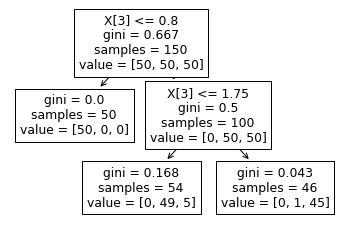

In [19]:
# tree 시각화

tree.plot_tree(clf)

In [20]:
# tree 시각화

r = export_text(clf,feature_names = iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



In [21]:
# 의사결정나무 객체 생성 

# tree depth 조정
clf = tree.DecisionTreeClassifier(max_depth=3) # 3개로 분류 

# 훈련
clf = clf.fit(X_iris,y_iris)

# test data 사용 예측
clf.predict([[5.6,2.4,4.1,1.1]]) # 맘대로 넣기 
# array([1]) >> 2번째  붓꽃으로 분류되었다. 

array([1])

[Text(0.375, 0.875, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]')]

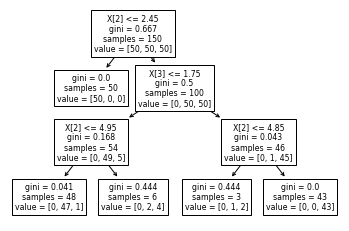

In [22]:
# tree 시각화

tree.plot_tree(clf)

In [23]:
# tree 시각화

r = export_text(clf,feature_names = iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



In [ ]:
# 분기에 사용된 feature 도 재사용됨을 알 수 있다. 

In [24]:
# 의사결정나무 객체 생성 

# tree depth 조정
clf = tree.DecisionTreeClassifier(max_depth=1) # 3개로 분류 

# 훈련
clf = clf.fit(X_iris,y_iris)

# test data 사용 예측
clf.predict([[5.6,2.4,4.1,1.1]]) # 맘대로 넣기 
# array([1]) >> 2번째  붓꽃으로 분류되었다. 

array([1])

[Text(0.5, 0.75, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 100\nvalue = [0, 50, 50]')]

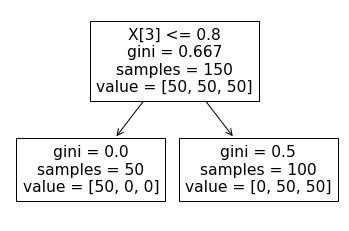

In [25]:
# tree 시각화

tree.plot_tree(clf)

In [26]:
# tree 시각화

r = export_text(clf,feature_names = iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- class: 1



In [43]:
# pruning 기법 활용 depth 조정

clf = tree.DecisionTreeClassifier(ccp_alpha=0.01)
 # 3개로 분류 
# cop_alpha : 작을수록 규제가 작다. 

# 훈련

clf = clf.fit(X_iris, y_iris)

# test data 예측
clf.predict([[5.6,2.4,4.1,1.1]])
# array([1]) : 두번째 (setosa)로 예측

array([1])

[Text(0.5, 0.9, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6666666666666666, 0.7, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.5, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.3333333333333333, 0.3, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

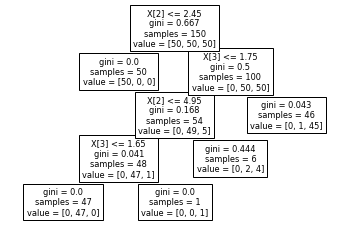

In [44]:
# tree 시각화

tree.plot_tree(clf)

# boosting

In [39]:
# Boosting 예제
# 데이터 임의로 섞기 (random shuffling)

X_iris, y_iris= shuffle(X_iris, y_iris, random_state=0)

In [40]:
X_iris[:10]

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3]])

In [41]:
y_iris

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2,
       1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [42]:
# train data, test data 구분 

X_train, X_test = X_iris[:120], X_iris[120:]
y_train, y_test = y_iris[:120], y_iris[120:]

In [47]:
for n_trees in [1,10,50,100]:
  # boosting 객체 생성 및 훈련 
  clf = GradientBoostingClassifier(n_estimators=n_trees, learning_rate=1.0,
                             max_depth=1,random_state=0).fit(X_train, y_train)
  print(clf.score(X_test,y_test))

0.9
0.9333333333333333
0.9333333333333333
0.9333333333333333


In [48]:
for n_trees in [1,10,50,100]:
  # boosting 객체 생성 및 훈련 
  clf = GradientBoostingClassifier(n_estimators=n_trees, learning_rate=1.0,
                             max_depth=1,random_state=0).fit(X_train, y_train)
  print(clf.score(X_test,y_test))

0.9
0.9333333333333333
0.9333333333333333
0.9333333333333333


# hitter data set 실습 

In [53]:
hitters = pd.read_csv('/content/drive/MyDrive/새싹sw-인공지능 서비스 개발자/CLASSROOM/CODE PDF/머신러닝/Hitters.csv',index_col=0)

In [54]:
# 데이터 임의로 섞기
hitters = shuffle(hitters,random_state=0)

In [55]:
hitters[:10]

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
559,141,2,48,61,73,8,3162,874,16,421,349,359,N,E,352,414,9,925.0,N
585,139,31,93,94,62,17,7546,1982,315,1141,1179,727,A,E,0,0,0,950.0,A
183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
512,117,29,54,88,43,6,1750,412,100,204,276,155,A,W,1236,98,18,100.0,A
600,144,33,85,117,65,2,696,173,38,101,130,69,A,W,319,4,14,165.0,A
341,95,6,48,42,20,10,2964,808,81,379,428,221,N,W,158,4,5,100.0,N
524,132,9,69,47,54,2,972,260,14,123,92,90,A,E,212,327,20,NaN,A
437,123,9,62,55,40,9,4139,1203,79,676,390,364,A,E,82,170,15,1260.0,A
216,53,1,31,15,22,4,926,210,9,118,69,114,N,W,73,152,11,225.0,N


In [56]:
# NaN 포함된 행 제거
hitters = hitters.dropna()
hitters.head(5)

,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,,,,,,,,,,,,,,,,,,,
559,141,2,48,61,73,8,3162,874,16,421,349,359,N,E,352,414,9,925.0,N
585,139,31,93,94,62,17,7546,1982,315,1141,1179,727,A,E,0,0,0,950.0,A
512,117,29,54,88,43,6,1750,412,100,204,276,155,A,W,1236,98,18,100.0,A
600,144,33,85,117,65,2,696,173,38,101,130,69,A,W,319,4,14,165.0,A
341,95,6,48,42,20,10,2964,808,81,379,428,221,N,W,158,4,5,100.0,N


In [60]:
# hitter data 활용, random forest 모델 적용

# k-fold CV의 fold 수 지정
n_fold =5

for t_param in ('sqrt', 5):
  print('Number of features: ',t_param)
  kf = KFold(n_splits=n_fold)
  idx = 1

  sum_val_mse = 0 
  for train, val in kf.split(hitters):
    print('Fold: #', idx)

    # train set 의 feature와 response 분리
    train_X = hitters.iloc[train][['Hits','HmRun','Runs','Walks','Years']]
    train_y = hitters.iloc[train]['Salary']

    # test set 의 feature와 response 분리
    val_X = hitters.iloc[val][['Hits','HmRun','Runs','Walks','Years']]
    val_y = hitters.iloc[val]['Salary']

    # random forest 객체 생성
    rf = RandomForestRegressor(max_depth=3, max_features=t_param, random_state =0)

    # 훈련용 데이터셋 이용 적합 
    rf.fit(train_X, train_y)

    # validation data로 예측
    val_y_pred = rf.predict(val_X)

    # validaton MSE
    val_mse = mean_squared_error(val_y, val_y_pred)
    print('validation MSE: %.2f'%val_mse)

    # validation mse 합계
    sum_val_mse += val_mse

    print('------------------------------------------')
    idx += 1 

print('average validation mse: %.2f'%(sum_val_mse/n_fold))
print('********************************************')



Number of features:  sqrt
Fold: # 1
validation MSE: 79710.02
------------------------------------------
Fold: # 2
validation MSE: 95799.47
------------------------------------------
Fold: # 3
validation MSE: 138658.70
------------------------------------------
Fold: # 4
validation MSE: 91889.05
------------------------------------------
Fold: # 5
validation MSE: 155939.57
------------------------------------------
Number of features:  5
Fold: # 1
validation MSE: 61562.94
------------------------------------------
Fold: # 2
validation MSE: 87234.29
------------------------------------------
Fold: # 3
validation MSE: 131675.76
------------------------------------------
Fold: # 4
validation MSE: 85842.90
------------------------------------------
Fold: # 5
validation MSE: 161507.52
------------------------------------------
average validation mse: 105564.68
********************************************
